# Call - Put Options

The OptionPricing class provides tools to price vanilla European call and put options using both the Monte Carlo simulation method and the Black-Scholes analytical formula. This class allows for the simulation of stock price paths under the Geometric Brownian Motion model, and calculates the fair value of options based on these paths.

Key features include:

1- Monte Carlo Simulation: Simulates stock price trajectories and computes option payoffs at maturity.

2- Black-Scholes Formula: Provides an analytical solution for both call and put options using the Black-Scholes model.

3- Plotting Functions: Visualize the simulated stock price paths and terminal value distributions for deeper insight into option price dynamics.

The class is flexible, allowing users to adjust the initial stock price, volatility, risk-free rate, number of paths, and time steps.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
class OptionPricing:
    
    def __init__(self, S_0, rf, sigma, Nt, Np):
        """
        Initialize the option pricing model with 
        stock price (S_0), 
        risk-free rate (rf), 
        volatility (sigma), 
        number of time steps (Nt), 
        number of paths (Np).
        """
        if Nt <= 0 or Np <= 0:
            raise ValueError("Nt and Np must be positive integers.")
        
        self.S_0 = S_0
        self.rf = rf
        self.sigma = sigma
        self.Nt = Nt
        self.Np = Np
        np.random.seed(42)

    def MCpath(self, K, T):

        """
        Simulate Monte Carlo stock price trajectories.

        Args:
            K (float): Strike price of the option.
            T (float): Time to maturity in years.

        Returns:
            np.ndarray: Simulated stock prices for Np paths and Nt time steps.

        """
        dt = T/self.Nt
        z = np.random.choice([-1, 1], size = (self.Nt, self.Np))

        #Calculate the return
        log_rets = (self.rf - 0.5 *self.sigma**2)* dt + self.sigma * np.sqrt(dt) * z
        log_prices = np.log(self.S_0) + log_rets.cumsum(axis = 0)
        prices = np.exp(log_prices)
    
        return prices

    def Call_option(self, K, T):

        """
      Calculate European call option value using Monte Carlo simulation.

        Args:
            K (float): Strike price.
            T (float): Time to maturity in years.

        Returns:
            tuple: Contains simulated call option prices, mean, standard deviation, terminal values, and discounted option value.
        """
      
        prices = self.MCpath(K, T)

        call_prices = np.maximum(prices - K, 0)  
        terminal_values = call_prices[-1]

        mean = np.mean(terminal_values)
        std = np.std(terminal_values)
        option_value = np.exp(-self.rf*T) * mean
        
        return call_prices, mean, std, terminal_values, option_value

    def call_option_analytical_solution(self, t, K, T):
                
        """
        Analytical solution for the call option using Black-Scholes formula.
        """
        
        d_1 = (np.log(self.S_0/(K * np.exp(-self.rf*(T-t)))))/(sigma*np.sqrt(T-t)) + 0.5*sigma*np.sqrt(T-t)

        d_2 = (np.log(self.S_0/(K * np.exp(-self.rf*(T-t)))))/(sigma*np.sqrt(T-t)) - 0.5*sigma*np.sqrt(T-t)

        option_value = self.S_0 * norm.cdf(d_1) - K * np.exp(-rf*(T-t))*norm.cdf(d_2)

        return option_value
        

    def Put_option(self, K, T):
        
        """
        Calculate European put option value using Monte Carlo simulation.

        Args:
            K (float): Strike price.
            T (float): Time to maturity in years.

        Returns:
            tuple: Contains simulated put option prices, mean, standard deviation, terminal values, and discounted option value.
        """    
        prices = self.MCpath(K, T)

        put_prices = np.maximum(K - prices, 0)  
        terminal_values = put_prices[-1]

        mean = np.mean(terminal_values)
        std = np.std(terminal_values)
        option_value = np.exp(-self.rf*T) * mean
        
        return put_prices, mean, std, terminal_values, option_value
        
    def put_option_analytical_solution(self, t, K, T):
        """
        Analytical solution for the put option using Black-Scholes formula.
        """
        d_1 = (np.log(self.S_0 / (K * np.exp(-self.rf * (T - t)))) / 
               (self.sigma * np.sqrt(T - t))) + 0.5 * self.sigma * np.sqrt(T - t)
        d_2 = d_1 - self.sigma * np.sqrt(T - t)
        option_value = (K * np.exp(-self.rf * (T - t)) * norm.cdf(-d_2)) - (self.S_0 * norm.cdf(-d_1))
        return option_value   
       
    def plot_paths(self, prices):
        
        """
        Plot simulated stock price trajectories.
        """

        prices_df = pd.DataFrame(prices)
        ax = prices_df.iloc[:, :100].plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))

        ax.set_title("Simulated Stock Price Trajectories")
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Stock Price")
        plt.show()
            
    def plot_terminal_hist(self, terminal_values):
        
        """
        Plot a histogram of the terminal stock prices.
        """
        plt.hist(terminal_values, bins=20, alpha=0.7, color='steelblue')
        plt.title("Histogram of Terminal Stock Prices")
        plt.xlabel("Stock Price")
        plt.ylabel("Frequency")
        plt.show()
        


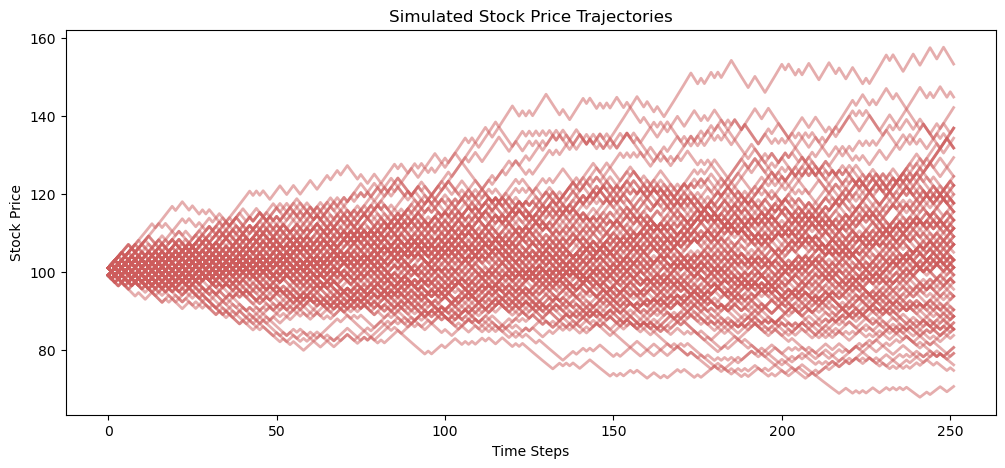

In [14]:
rf = 0.06
sigma = 0.15
S0 = 100   #initial price
K = 100 # Strike price
Nt = 252    #number of time steps per path
Np = 100000  #  number of paths
T = 1 #  in year
price_generator = OptionPricing(S0, rf, sigma, Nt, Np)
prices = price_generator.MCpath(K, T)
price_generator.plot_paths(prices)


In [15]:
rf = 0.1
sigma = 0.3
S0 = 100   #initial price
K = 100 # Strike price
Nt = 252    #number of time steps per path
Np = 100000  #  number of paths
T = 1 #  in year
price_generator = OptionPricing(S0, rf, sigma, Nt, Np)
prices = price_generator.MCpath(K, T)

put_prices = price_generator.Put_option(K, T)
print(f"The mean {put_prices[1]:.3f} and standard deviation {put_prices[2]:.3f} and option call value {put_prices[4]:.3f} generated paths")

put_prices_analytical = price_generator.put_option_analytical_solution(0, K, T)
print(f"The analytical solution of the Black Scholde model for call option {put_prices_analytical:.3f}")

The mean 7.978 and standard deviation 12.451 and option call value 7.219 generated paths
The analytical solution of the Black Scholde model for call option 7.218


In [16]:
rf = 0.06
sigma = 0.15
S0 = 100   #initial price
K = 100 # Strike price
Nt = 252    #number of time steps per path
Np = 50000   #  number of paths
T = 1 #  in year
price_generator = OptionPricing(S0, rf, sigma, Nt, Np)
prices = price_generator.MCpath(K, T)
call_prices = price_generator.Call_option(K, T)
print(f"The mean {call_prices[1]:.3f} and standard deviation {call_prices[2]:.3f} and option call value {call_prices[4]:.3f} generated paths")

call_prices_analytical = price_generator.call_option_analytical_solution(0, K, T)
print(f"The analytical solution of the Black Scholde model for call option {call_prices_analytical:.3f}")

The mean 9.719 and standard deviation 12.043 and option call value 9.153 generated paths
The analytical solution of the Black Scholde model for call option 9.173
